## **Predict Future Sales: 時系列を考慮した特徴量**
Final project for "How to win a data science competition" Coursera course<br>
https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview

#### **Data Preparation**

In [4]:
import pandas as pd 
import numpy as np
import glob
import os 
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(os.path.join("data","data03.csv"),index_col=0)
data

C:\Users\organ\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date_block_num,shop_id,item_id,item_cnt_day,data_type,ID,date_time,item_price - min,item_price - max,item_price - mean,...,item_cnt_day_lag_6,item_cnt_day_lag_12,item_name_translated,item_cat1,item_cat2,year,month,City,Type,weekday
0,0,0,32,6.0,train,NaN,2013-01-31,221.0,221.0,221.0,...,NaN,NaN,32.0,3.0,23.0,2013.0,1.0,26.0,3.0,3.0
1,0,0,32,6.0,train,NaN,2013-01-31,221.0,221.0,221.0,...,NaN,NaN,32.0,3.0,23.0,2013.0,1.0,26.0,3.0,3.0
2,0,0,33,3.0,train,NaN,2013-01-31,347.0,347.0,347.0,...,NaN,NaN,33.0,3.0,9.0,2013.0,1.0,26.0,3.0,3.0
3,0,0,33,3.0,train,NaN,2013-01-31,347.0,347.0,347.0,...,NaN,NaN,33.0,3.0,9.0,2013.0,1.0,26.0,3.0,3.0
4,0,0,35,1.0,train,NaN,2013-01-31,247.0,247.0,247.0,...,NaN,NaN,37.0,3.0,23.0,2013.0,1.0,26.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14122768,34,45,15757,NaN,test,214197.0,NaN,199.0,199.0,199.0,...,NaN,NaN,12419.0,12.0,16.0,NaN,NaN,15.0,4.0,NaN
14122769,34,45,19648,NaN,test,214198.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122770,34,45,969,NaN,test,214199.0,NaN,549.0,549.0,549.0,...,NaN,NaN,950.0,3.0,9.0,NaN,NaN,15.0,4.0,NaN
14122771,34,45,969,NaN,test,214199.0,NaN,549.0,549.0,549.0,...,NaN,NaN,950.0,3.0,9.0,NaN,NaN,15.0,4.0,NaN


#### **欠損地が多いカラム**

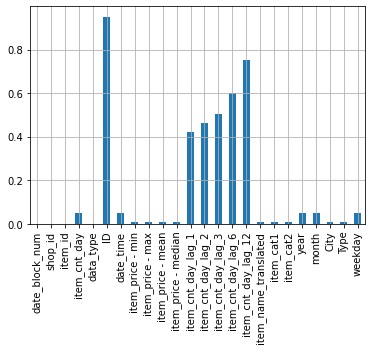

In [9]:
rank = data.isna().sum()/len(data)
rank.plot.bar()
plt.grid(True)
plt.show()

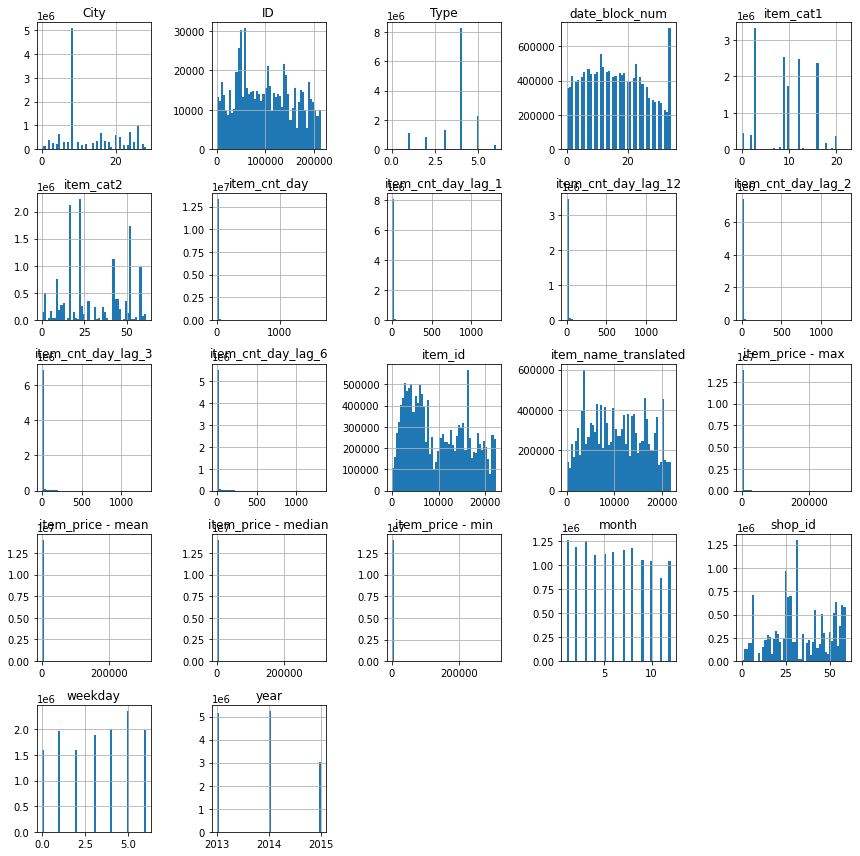

In [14]:
data.hist(figsize=(12,12),bins=50)
plt.grid(True)
plt.tight_layout()
plt.show()

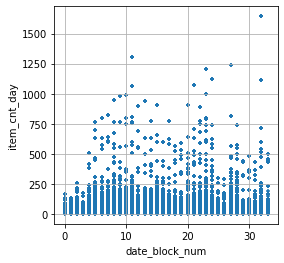

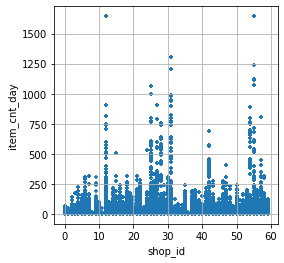

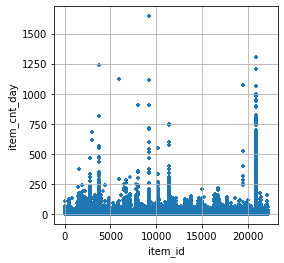

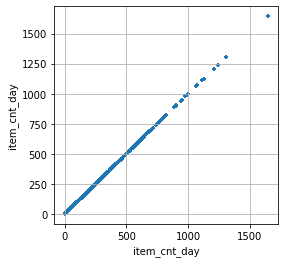

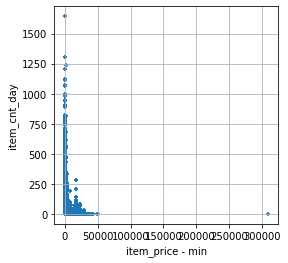

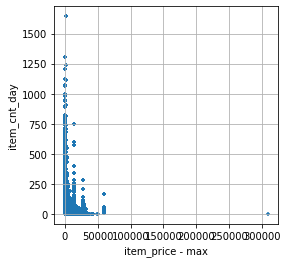

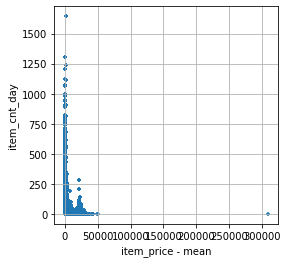

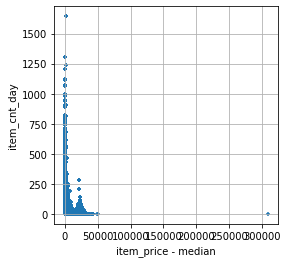

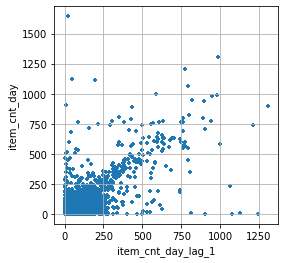

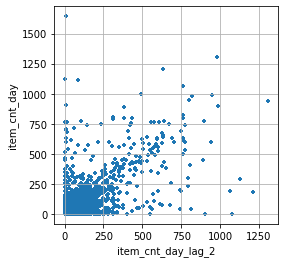

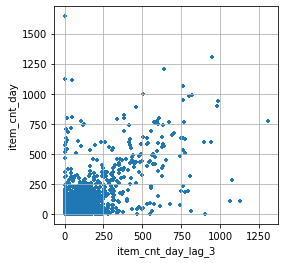

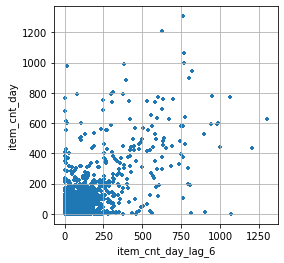

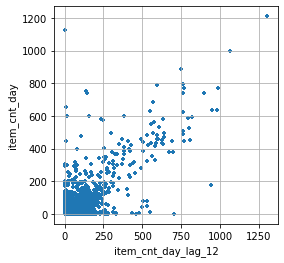

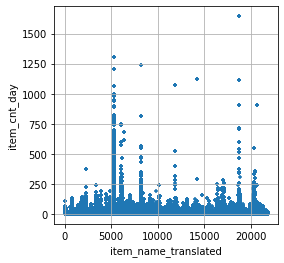

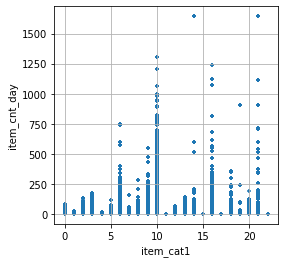

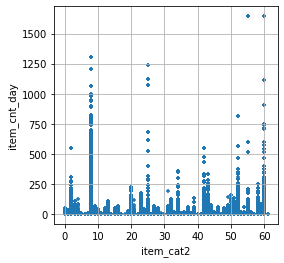

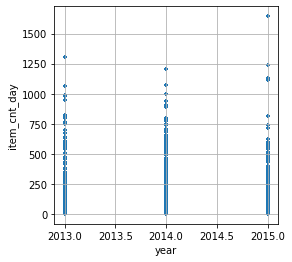

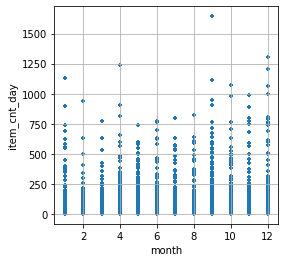

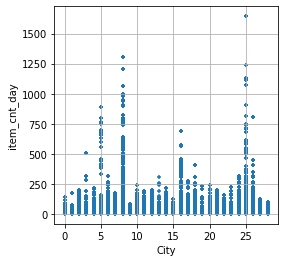

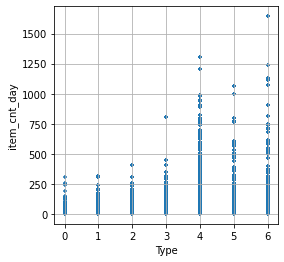

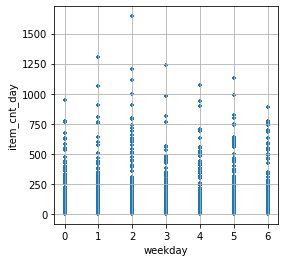

In [18]:
target = "item_cnt_day"
for col in data.columns:
    df = data[[target]+[col]].dropna()
    
    if len(df) >= 100:
        try:
            df.plot.scatter(x=col,
                            y=target,
                            marker="+",
                            figsize=(4,4))

            plt.grid(True)
            plt.show()
        except:
            pass